In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/amir/PycharmProjects/rqc_internship/sensor_repo


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as jn
import os
import yaml
import torch
from torchinfo import summary
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, Dataset


In [3]:
from video_pipeline.video_module import *

In [6]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
with open('pathes.yaml') as conf_file:
    path_config = yaml.safe_load(conf_file)

pressure_path = path_config['p_video_path']
signal_path = path_config['s_video_path']


In [7]:
v_ds = Video_dataset(pressure_path, signal_path)
v_ds.split_to_chains(300)
len(v_ds)

137

In [8]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time 

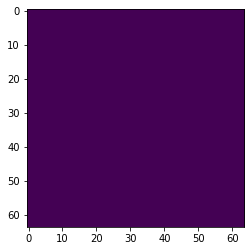

In [9]:
plt.imshow(v_ds[4][1][15])
plt.show()

In [ ]:
%matplotlib inline

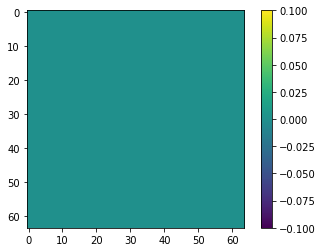

In [ ]:
for i in range(0, 300, 20):
    clear_output(wait=True)
    plt.imshow(v_ds[20][1][i])
    plt.colorbar()
    plt.show()
    time.sleep(0.1)


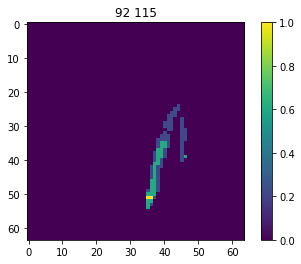

In [14]:
for i in range(110, 120, 5):
    clear_output(wait=True)
    n = 64*1+28
    plt.imshow(v_ds[n][1][i])
    plt.title(f"{n} {i}")
    plt.colorbar()
    plt.show()
    time.sleep(0.5)


In [15]:
test_pressures = [
    v_ds[92][1][110],
    # v_ds[108][1][190],
    # v_ds[329][1][169],
    # v_ds[521][1][190],
    # v_ds[604][1][145],

]

In [16]:
pres = [torch.tensor(x) for x in test_pressures]

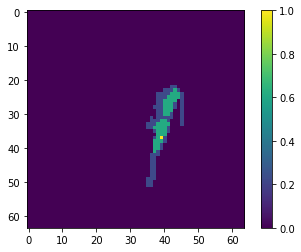

In [17]:
for pres in test_pressures:
    plt.imshow(pres)
    plt.colorbar()
    plt.show()

In [53]:
config['sim']['test_mod'] = True

In [54]:
import torch_sensor_lib as tsl
import matplotlib
from torchvision.transforms import InterpolationMode
sim = tsl.FiberSimulator(config)

Rot tensors


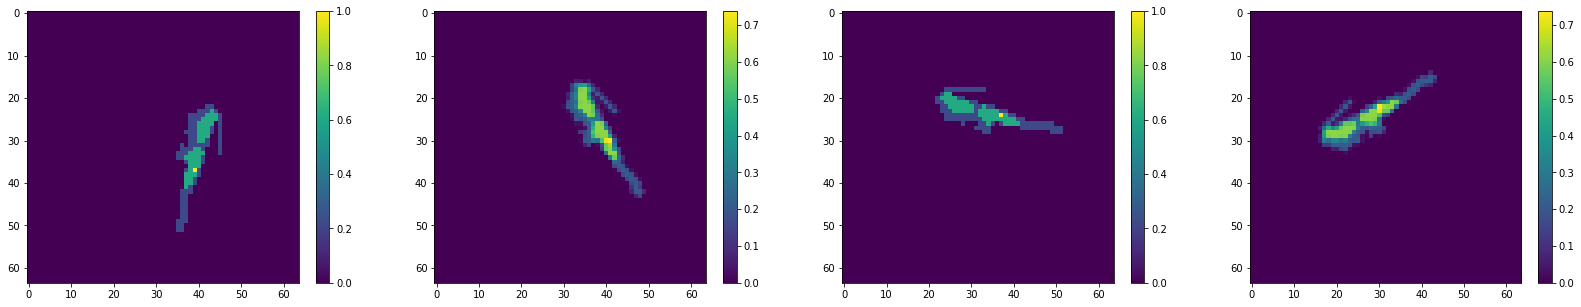

After blur


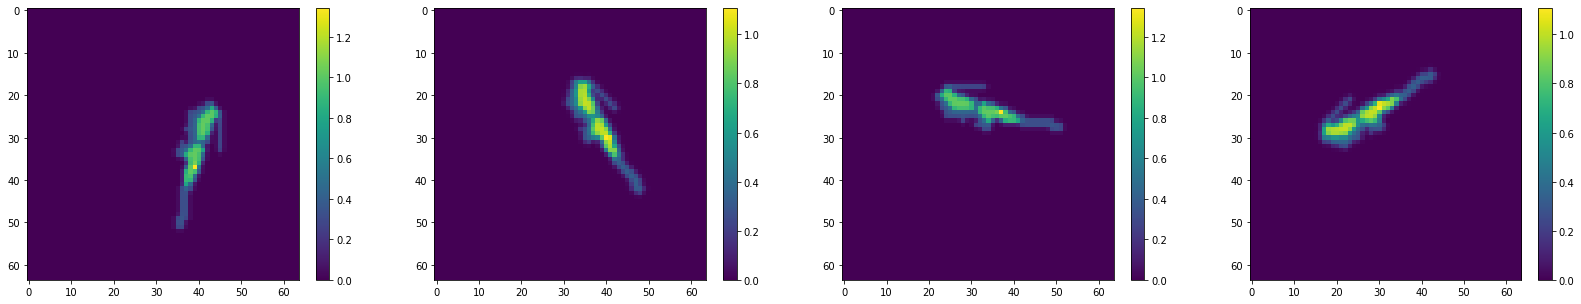

Loss in fiber


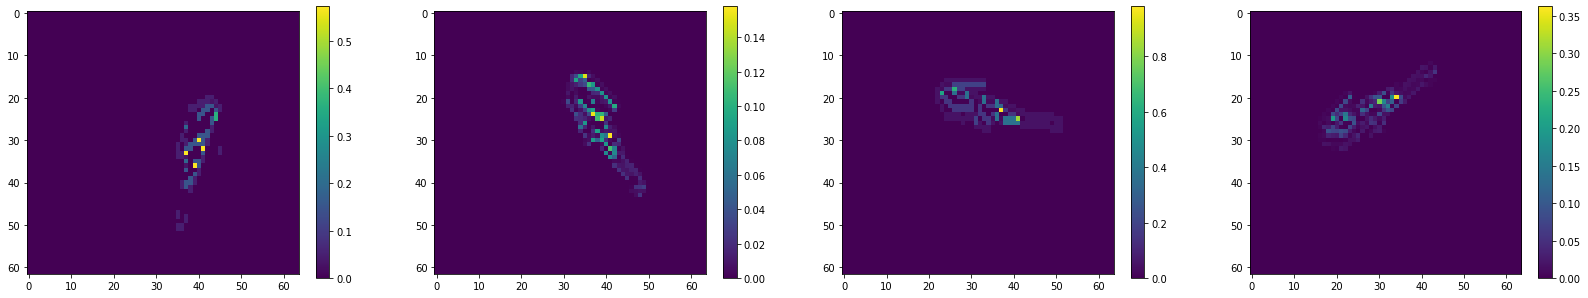

Loss sums


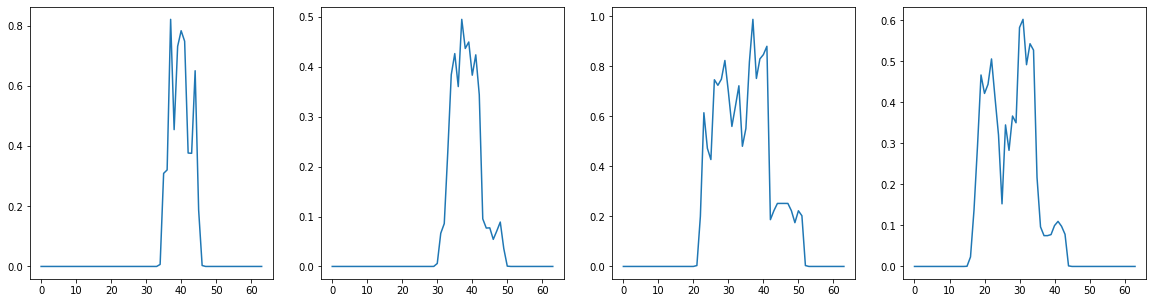

Signal


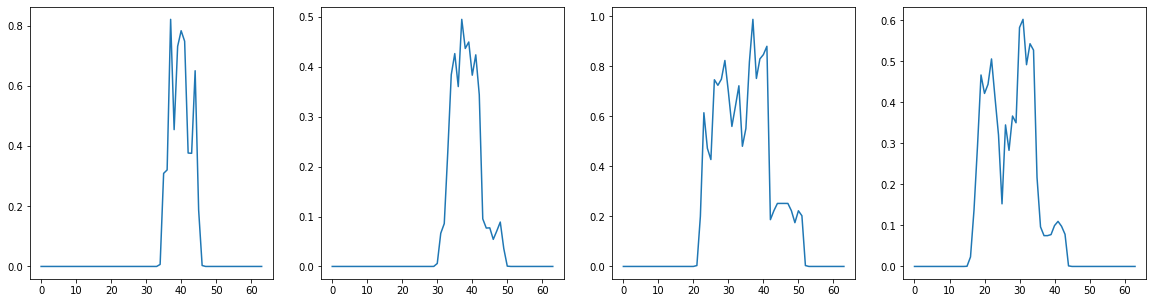

In [55]:
sim.fiber_real_sim(test_pressures[0]);

In [ ]:
gaus_example = np.load('data/pressure/pic/0.npy')[:20]
gaus_example.shape

(20, 64, 64)

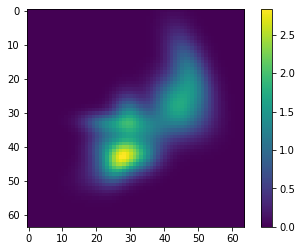

In [ ]:
plt.imshow(gaus_example[0])
plt.colorbar()